In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor

## Columns in  `Train Data`

- **Id**: unique identifier.
- **AB-GL**: Fifty six anonymized health characteristics. All are numeric except for *EJ*, which is categorical.
- **Class**: A binary target (what we would like to predict).


In [38]:
train_data = pd.read_csv("data/train.csv", index_col="Id")
train_data.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
Id,,,,,,,,,,,,,,,,,,,,,
000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617 entries, 000ff2bfdfe9 to ffcca4ded3bb
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float64
 1   AF      617 non-null    float64
 2   AH      617 non-null    float64
 3   AM      617 non-null    float64
 4   AR      617 non-null    float64
 5   AX      617 non-null    float64
 6   AY      617 non-null    float64
 7   AZ      617 non-null    float64
 8   BC      617 non-null    float64
 9   BD      617 non-null    float64
 10  BN      617 non-null    float64
 11  BP      617 non-null    float64
 12  BQ      557 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      615 non-null    float64
 16  CC      614 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    

In [40]:
train_data.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


## Columns in  `Metadata`

- **Alpha**: identifies the type of age-related condition, if present.
    - *A*: No age-related condition (Class 0).
    - *B*, *D*, *G*: The three age-related conditions (Class 1).
- **Beta**, **Gamma**, **Delta**: Three experimental characteristics.
- **Epsilon**: The date for this subject was collected.


In [41]:
metadata = pd.read_csv("data/greeks.csv", index_col="Id")
metadata.head()

,Alpha,Beta,Gamma,Delta,Epsilon
Id,,,,,
000ff2bfdfe9,B,C,G,D,3/19/2019
007255e47698,A,C,M,B,Unknown
013f2bd269f5,A,C,M,B,Unknown
043ac50845d5,A,C,M,B,Unknown
044fb8a146ec,D,B,F,B,3/25/2020


In [42]:
metadata.replace('Unknown', np.nan, inplace=True)
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617 entries, 000ff2bfdfe9 to ffcca4ded3bb
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Alpha    617 non-null    object
 1   Beta     617 non-null    object
 2   Gamma    617 non-null    object
 3   Delta    617 non-null    object
 4   Epsilon  473 non-null    object
dtypes: object(5)
memory usage: 28.9+ KB


## Exploring metadata

In [43]:
fig = make_subplots(rows=2, cols=2)

fig.add_trace(go.Histogram(x=metadata["Alpha"], histnorm='probability density',
                           name="Alpha"), row=1, col=1)
fig.add_trace(go.Histogram(x=metadata["Beta"], histnorm='probability density',
                           name="Beta"), row=1, col=2)
fig.add_trace(go.Histogram(x=metadata["Gamma"], histnorm='probability density',
                           name="Gamma"), row=2, col=1)
fig.add_trace(go.Histogram(x=metadata["Delta"], histnorm='probability density',
                           name="Delta"), row=2, col=2)

fig.update_layout(title_text="Distributions in metadata")


fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

As we can see in the above figure, the distributions are very concentrated:

- **Alpha**: At A (Class 0)
- **Beta**: At C - it is more spread than others
- **Gamma**: At M
- **Delta**: At B

In [44]:
fig = px.histogram(metadata, x="Alpha", histnorm='probability density', color="Beta", 
                   pattern_shape="Delta")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [45]:
fig = px.histogram(metadata, x="Alpha", histnorm='probability density', color="Beta",
                   pattern_shape="Gamma")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [46]:
fig = px.histogram(metadata, x="Alpha", histnorm='probability density', color="Delta",
                   pattern_shape="Gamma")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Only some combinations among **Beta**, **Gamma** and **Delta** are available in *metadata* dataframe that could help our model to find tendencies

## Exploring train data

Since there are many columns, distributions for each column on the train data are shown on secondary jupyter notebooks, which can be seen by accessing the full project repository on https://github.com/Alt-Merklein/ICR-Competition.

For now, let us first explore the correlation matrix for the train dataset. However, it will not be used on our first approach

<AxesSubplot:>

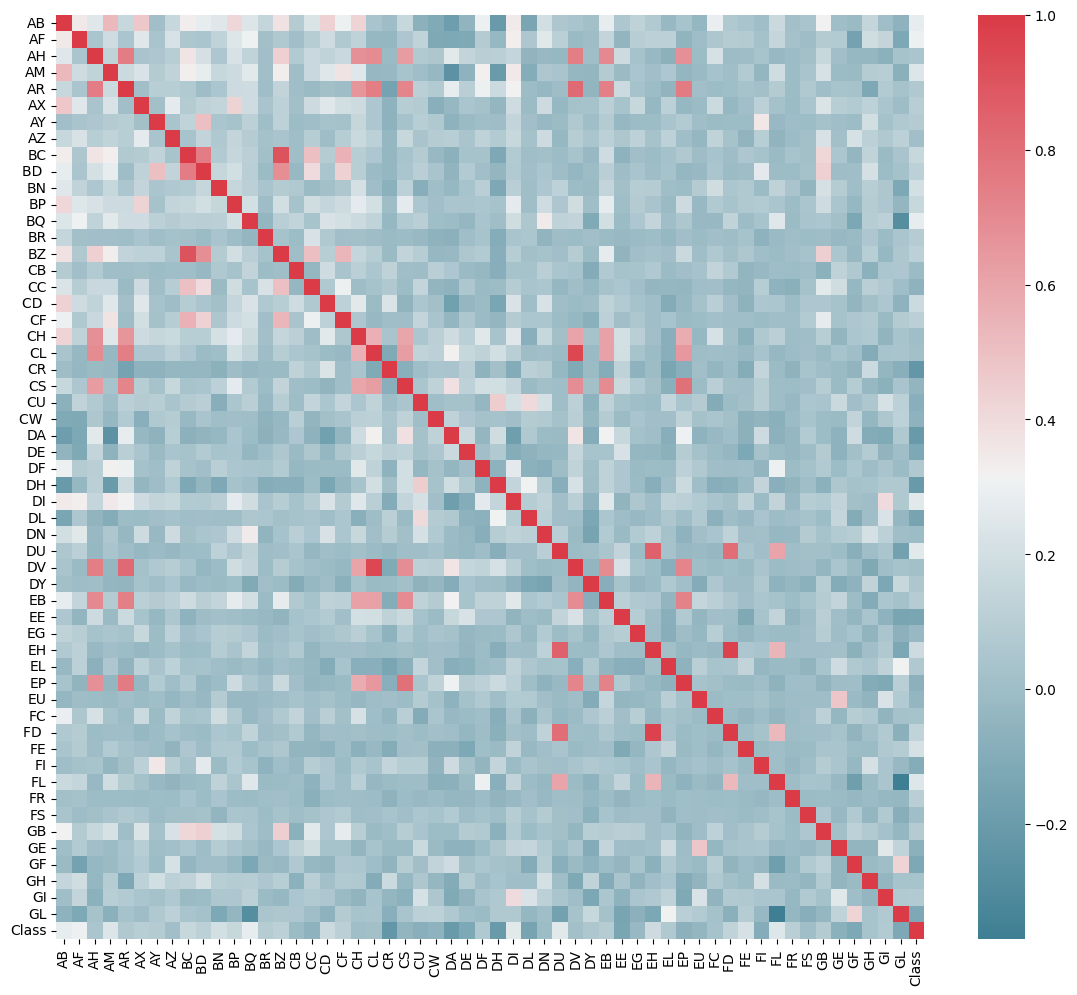

In [47]:
corr_matrix = train_data.corr();
plt.figure(figsize=(14,12))
cmap = sns.diverging_palette(220,10,as_cmap=True)

#plot
sns.heatmap(corr_matrix,cmap=cmap,annot=False,fmt=".2f")

Note that there are a few columns with high correlation. Let's ignore them for now
Next, as studied in the secondary notebooks mentioned earlier, there are some columns with a few missing entries, but we saw that they follow a distribution aprox. Normal, so we decided to simply replace the missing values with the mean. We also removed outliers from the columns using the cell below

In [48]:

missing_columns = ["BQ", "CB", "CC", "DU", "EL", "FC", "FS", "FL","GL"]
train_data[missing_columns] = train_data[missing_columns].fillna(train_data[missing_columns].mean())

z_scores = stats.zscore(train_data.copy().drop(columns=["EJ"])) #EJ is categorical
threshold = 3
train_data_filtered = train_data[(z_scores.abs() < threshold).all(axis=1)]

#Display info about new data
train_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 000ff2bfdfe9 to fe1942975e40
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      428 non-null    float64
 1   AF      428 non-null    float64
 2   AH      428 non-null    float64
 3   AM      428 non-null    float64
 4   AR      428 non-null    float64
 5   AX      428 non-null    float64
 6   AY      428 non-null    float64
 7   AZ      428 non-null    float64
 8   BC      428 non-null    float64
 9   BD      428 non-null    float64
 10  BN      428 non-null    float64
 11  BP      428 non-null    float64
 12  BQ      428 non-null    float64
 13  BR      428 non-null    float64
 14  BZ      428 non-null    float64
 15  CB      428 non-null    float64
 16  CC      428 non-null    float64
 17  CD      428 non-null    float64
 18  CF      428 non-null    float64
 19  CH      428 non-null    float64
 20  CL      428 non-null    float64
 21  CR      428 non-null    

Sadly, we lost a considerable amount of entries by filtering outliers. But for now let us continue this way. Next step is separate data in training and validation parts

In [93]:
y = train_data_filtered["Class"]
X =train_data_filtered.drop(["Class"],axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8,test_size=0.2,random_state=0)

Now, to deal with the categorical column EJ, we will use one-hot encoding. This is because it has a really low cardinality (only 2). Some extra steps are also necessary since one-hot encoding messes up with the index of the dataframe

In [98]:
OH_encoder = OneHotEncoder(handle_unknown='ignore')
OH_X_train = pd.DataFrame((OH_encoder.fit_transform(X_train["EJ"].values.reshape(-1,1))).toarray())
OH_X_valid = pd.DataFrame((OH_encoder.transform(X_valid["EJ"].values.reshape(-1,1))).toarray())

OH_X_train.index = X_train.index
OH_X_valid.index = X_valid.index

num_X_train = X_train.drop(["EJ"], axis=1)
num_X_valid = X_valid.drop(["EJ"], axis=1)

OH_X_train = pd.concat([num_X_train, OH_X_train],axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_X_valid],axis=1)

OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)

Id
92b3778f624f    0
f46e39a96ee9    0
84c5b2d3eace    0
057287f2da6d    0
fe1942975e40    0
               ..
b9e388b48268    0
6f5908450956    1
457d8d386eb2    0
1a9fecf65695    0
65c5772a4afa    0
Name: Class, Length: 342, dtype: int64


# Creating and applying XGBoost ML model

Now that we have our data succesfully pre-processes, the next step is to define the machine learning model to be used and train it using the dataset. The model chosen was XGBoost. We also have to convert the Class column to bool type

In [112]:
model = XGBRegressor(random_state=0)
y_train = y_train.astype(bool)
y_valid = y_valid.astype(bool)
model.fit(OH_X_train,y_train)

#Predicting with the model
y_pred = model.predict(OH_X_valid)
print(y_pred)


[ 8.8199222e-01  8.2320064e-01 -9.3412641e-03  1.7821290e-02
 -4.7414564e-02  1.1895359e-01 -7.9863355e-04 -3.1353321e-03
  5.9782155e-02  3.5775158e-01  1.9007463e-04  1.7539811e-01
  4.2905707e-02 -1.8268040e-03  7.6904245e-02  2.8233707e-02
  2.7373682e-03  1.3671472e-02 -4.9539697e-03  2.2160362e-02
 -2.5401422e-04  3.0159181e-02  2.7576175e-02 -6.0892962e-03
 -2.0093317e-03 -3.9080428e-03  8.5133123e-01  7.6453604e-02
 -1.4543866e-02 -6.8091960e-03 -4.4628317e-03  2.1683534e-03
  1.5575452e-02 -2.5696927e-03 -3.7510511e-03  1.1310782e-02
  1.1406461e-02  9.6388064e-02 -1.6781435e-03 -1.9023562e-03
  2.2546381e-03  4.8536967e-02  5.7458789e-03 -1.0831846e-03
 -6.6772527e-03  7.1984321e-02 -3.5163413e-03  1.1997942e-03
  6.8333054e-01 -8.1928802e-06  5.1924411e-02  5.0201529e-01
  5.2040922e-03 -6.5550092e-03 -1.2781661e-03  7.7343352e-02
  3.4130219e-02 -8.0504464e-03  1.3779479e-03  9.2504084e-01
  6.9640368e-01  4.8910314e-03  6.6507496e-02 -1.5485864e-03
 -5.5096392e-03  2.49070

Notice how XGBoost predicts float values even when using a boolean column. To solve this, let us use the following convertion: if the score is greater than 0.5 it equals True. If not, it equals false. In the cell below, we compare the predicted values with the real values.

In [114]:
pred_threshold = 0.5  # Adjust this threshold as per your requirement
y_pred_bool = [True if pred >= pred_threshold else False for pred in y_pred]

correct_guesses = sum(pred == valid for pred, valid in zip(y_pred_bool, y_valid))
wrong_guesses = len(y_valid) - correct_guesses

print("Number of correct guesses:", correct_guesses)
print("Number of wrong guesses:", wrong_guesses)


Number of correct guesses: 81
Number of wrong guesses: 5
